# Handling missing data with CCA technique

In [1]:
import pandas as pd 
import numpy as np

In [6]:
df = pd.read_csv('data_science_job_data.csv')

In [7]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [10]:
df.shape

(19158, 13)

In [8]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [9]:
df.isnull().sum()/len(df)*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

## Checking the columns with less than 5% of missing values

In [12]:
missing_columns_5percent = [col for col in df.columns if df[col].isnull().mean() >0 and df[col].isnull().mean() <=0.05]
missing_columns_5percent

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [13]:
df[missing_columns_5percent].head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0


In [14]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [15]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [18]:
len(df[missing_columns_5percent].dropna())/len(df)*100

89.68577095730244

In [20]:
new_df = df[missing_columns_5percent].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

## Distribution of the data before dropping the missing values

In [24]:
import matplotlib.pyplot as plt

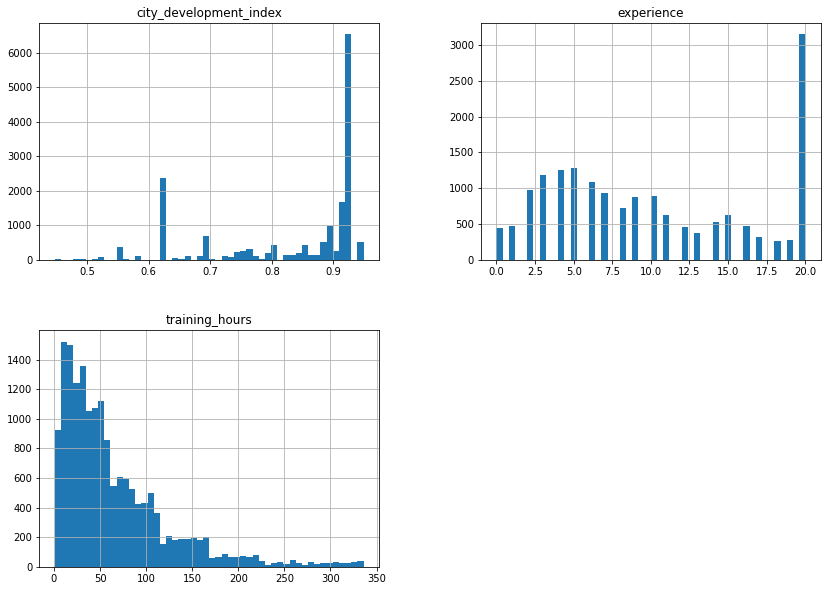

In [26]:
new_df.hist(bins = 50 , figsize=(14,10))
plt.show()

## Checking distribution of data before and after applying CCA technique

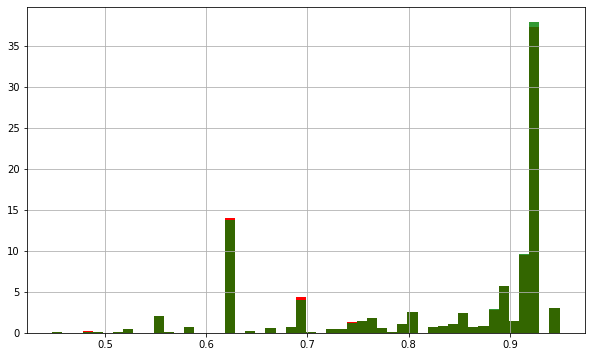

In [29]:
plt.figure(figsize=(10,6))
# original data
df['city_development_index'].hist(bins=50, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, color='green', density=True, alpha=0.8)
plt.show()

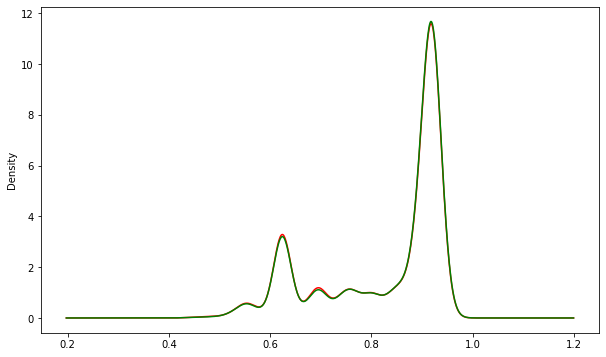

In [33]:
plt.figure(figsize=(10,6))
df['city_development_index'].plot.density(color = 'red')
new_df['city_development_index'].plot.density(color = 'green')
plt.show()

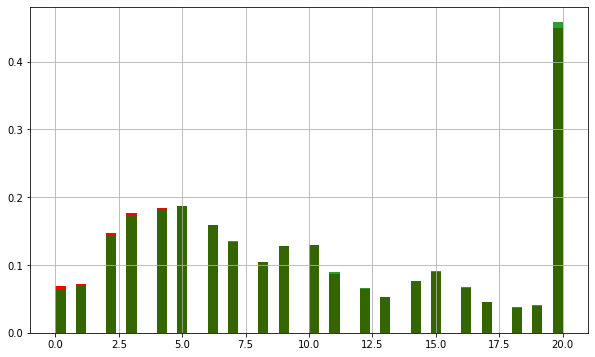

In [34]:
plt.figure(figsize=(10,6))
# original data
df['experience'].hist(bins=50, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, color='green', density=True, alpha=0.8)
plt.show()

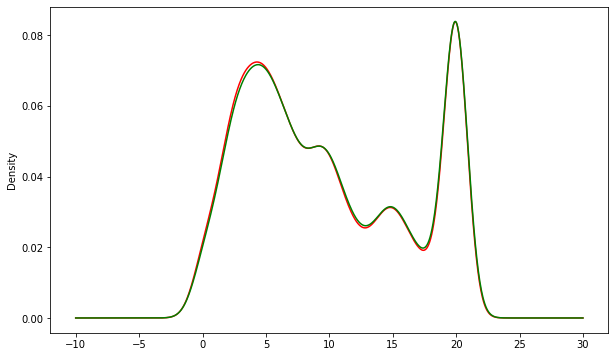

In [35]:
plt.figure(figsize=(10,6))
df['experience'].plot.density(color = 'red')
new_df['experience'].plot.density(color = 'green')
plt.show()

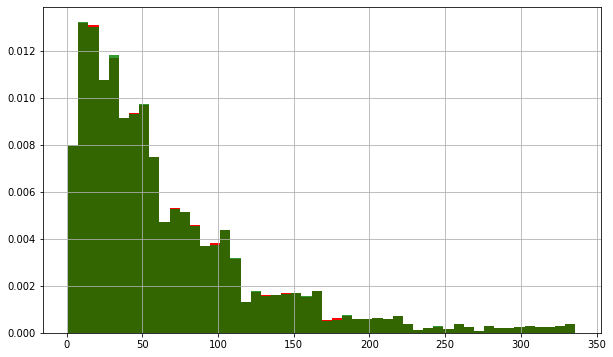

In [36]:
plt.figure(figsize=(10,6))
# original data
df['training_hours'].hist(bins=50, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, color='green', density=True, alpha=0.8)
plt.show()

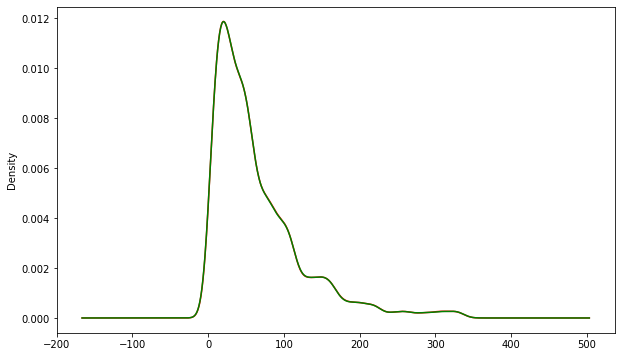

In [37]:
plt.figure(figsize=(10,6))
df['training_hours'].plot.density(color = 'red')
new_df['training_hours'].plot.density(color = 'green')
plt.show()

In [41]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df)*100,

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)*100
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,72.121307,73.518799
Full time course,19.610607,20.073333
Part time course,6.253262,6.407869


In [40]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df)*100,

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)*100
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,60.538678,61.983471
Masters,22.763336,23.408218
High School,10.528239,10.737982
Phd,2.160977,2.211617
Primary School,1.607683,1.658713
